# Getting Data Through APIs
Agenda today:
- Introduction to API & Remote Server Model 
- Open Authorization (OAuth)
- APIs Codealong!
    - Getting data through Google
    - `HTTPBIN`
    - Github API
    - Yelp API

Students will be able to...
- Explain the intuition behind using APIs
- Explain the intuition behind OAuth and its use cases
- Pull data through an API & transform them into a pandas dataframe

## Part I. What is an API?

API stands for __Application Programming Interface__. At some point or the other, large companies would build API for their products for their clients or internal use. It allows the company's application to communicate with another application. But what _exactly_ is an API?

#### Remote server 
When we think about the world of Web, we can think of it as a collection of _servers_. And servers are nothing but huge computers that store a huge amount of data from users and are optimized to process requests. For example, when you type in www.facebook.com, your browser sends a _request_ to the Facebook server, and gets a response from the server, thus interpreting the code and displaying your homepage. 

In this case, your browser is the _client_, and Facebook’s server is an API. To put it broadly, whenever you visit a website, you are interacting with its API. However, an API isn’t the same as the remote server — rather it is the part of the server that receives __requests__ and sends __responses__.

#### Types of requests status 
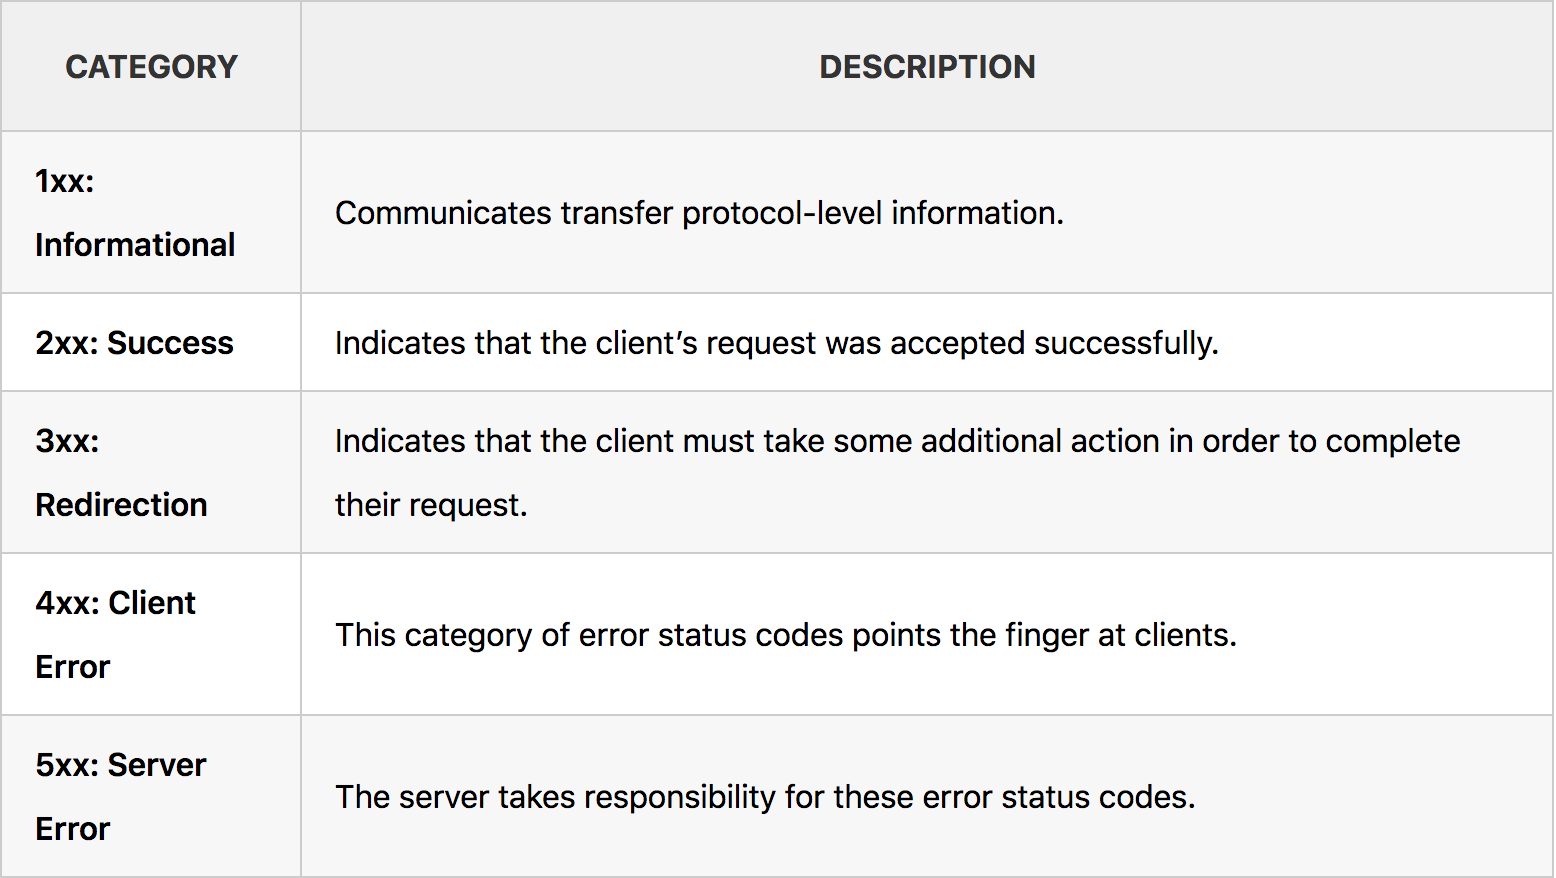

For more intuitive explanation of API, check out [this article.](https://medium.freecodecamp.org/what-is-an-api-in-english-please-b880a3214a82)

## Part II. OAuth - Open Authorization
Some API requires you to **authenticate** yourself through some kind of protocol to prove you are who you say you are in order for you to use their API to build your application and access their data. OAuth is an alternative protocal for a third party application to access some information from a service provider. To put simply, it is the process to **authorize** a third-party application to access information on the service provider. In other words, you use OAuth to **authenticate** via some other websites. This will then pass you some auth token to keep. You then send this token around with your requests to the service to **authorize** that request.

For example, when you sign up a service such as Coursera.com, it asks whether it is ok to access your profile and post updates to your profile without giving Coursera your Facebook password. The advantage of OAuth is that it minimizes the risks in which when Coursera is compromised, your Facebook pass is still safe. In this case, there are three parts here:
- The Consumer
- The Service Provider
- The User

How does OAuth work? Read this [blog](https://www.varonis.com/blog/what-is-oauth/)

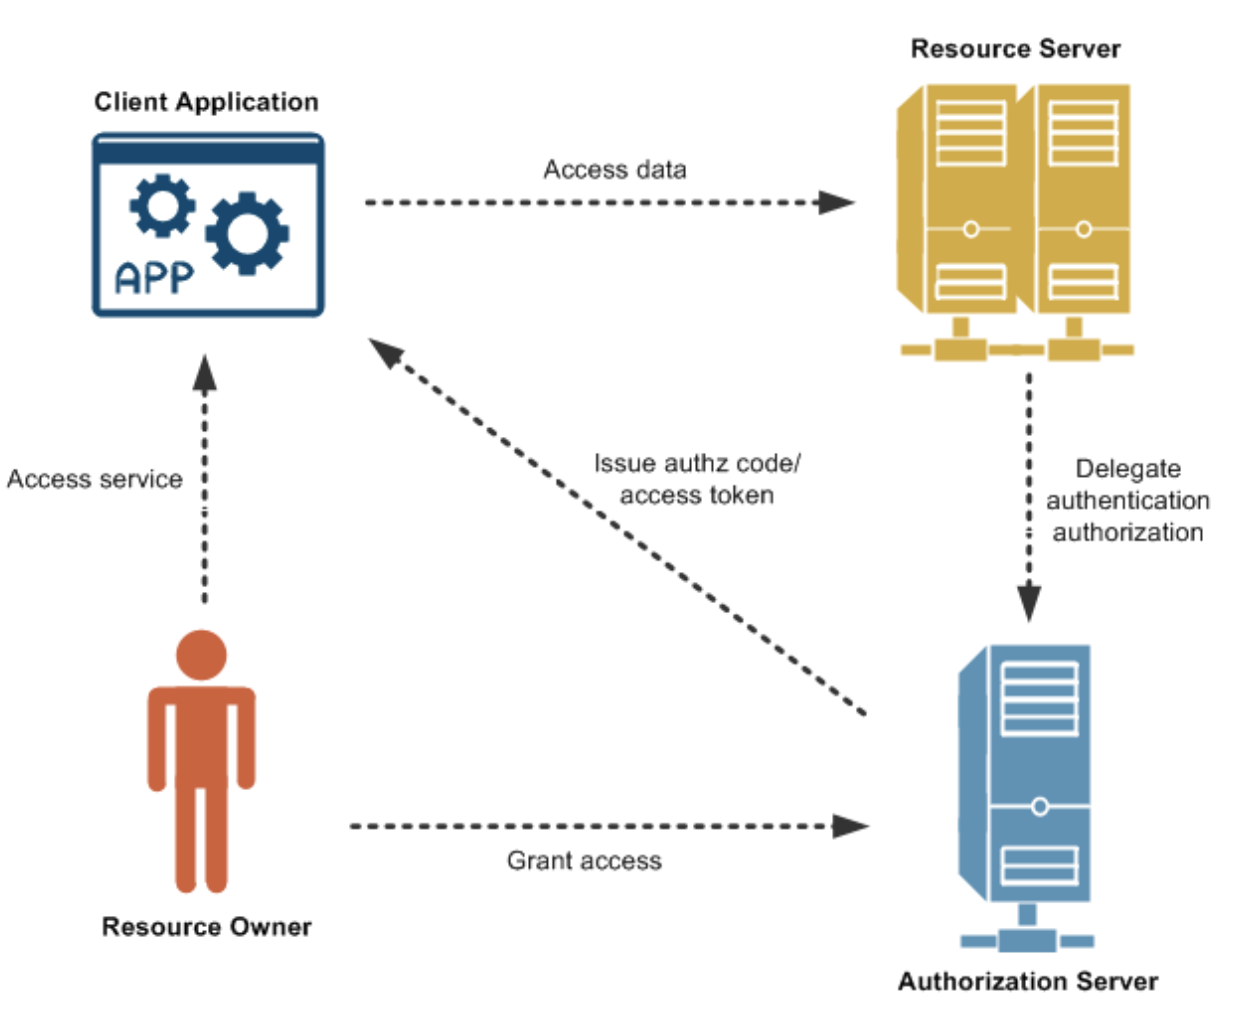

## Part III. Getting Data Through APIs

### Example 1. Making Requests to Google

In [ ]:
# importing the necessary libraries
import requests
import json 
import pandas as pd 

In [ ]:
# make a request to get information from google
resp = requests.get('https://www.google.com')

In [ ]:
# check request status 
resp

#### Checking Status Code
```python
resp.status.code == requests.codes.ok
```

In [ ]:
resp.status_code == requests.codes.ok

#### Checking response content 
`.text` property of the response object. 
```python
print (resp.text)
```

In [ ]:
# check response content 
resp.text[100:]

The response of an HTTP request can contain many headers that holds different bits of information. We can use `.headers` property of the response object to access the header information as shown below:

In [ ]:
# code here 
resp.headers

The content of the headers is our required element. You can see the key-value pairs holding various pieces of information about the resource and request. Let's try to parse some of these values using the `requests` library:

In [ ]:
print(resp.headers['Content-Type'])  # content type of the response
print(resp.headers['Date'])  # Date the response was sent
print(resp.headers['server'])   # Server type (google web service - GWS)

### Example 2. `Httpbin`
`httpbin.org` is a popular website to test different HTTP operation and practice with request-response cycles. Let's use httpbin/get to analyse the response to a GET request. First of all, we shall find out the response header and inspect how it looks. 

```python
r = requests.get('http://httpbin.org/get')

response = r.json()  
print(r.json())  
print(response['args'])  
print(response['headers'])  
print(response['headers']['Accept'])  
print(response['headers']['Accept-Encoding'])  
print(response['headers']['Host'])  
print(response['headers']['User-Agent'])  
print(response['origin'])  
print(response['url'])  
```

In [ ]:
# your code here 
r = requests.get('http://httpbin.org/get')

response = r.json()  
print(r.json())  
print(response['args'])  
print(response['headers'])  
print(response['headers']['Accept'])  
print(response['headers']['Accept-Encoding'])  
print(response['headers']['Host'])  
print(response['headers']['User-Agent'])  
print(response['origin'])  
print(response['url']) 

#### Passing Parameters in GET
In some cases, you'll need to pass parameters along with your GET requests. These extra parameters usually take the the form of query strings added to the requested URL. To do this, we need to pass these values in the `params` parameter. Let's try to acces information from `httpbin` with some user information. 

Note: The user information is not getting authenticated at `httpbin` so any name/password will work fine. This is merely for practice. 

```python
credentials = {'user_name': 'doe', 'password': 'jane'}  
r = requests.get('http://httpbin.org/get', params=credentials)

print(r.url)  
print(r.text)  
```

In [ ]:
# your code here  
credentials = {'user_name': 'doe', 'password': 'jane'}  
r = requests.get('http://httpbin.org/get', params=credentials)

print(r.url)  
print(r.text) 

### Example 3 -  Github API
Just like the two examples above, you do not need to authenticate yourself to access the Github API for specifc users. For example, if you want to check out the Github User Wes McKinney, you can simply send requests to it.

In [ ]:
git_resp = requests.get('https://api.github.com/users/wesm')

In [ ]:
git_resp

In [ ]:
# get the content of the response
git_resp.text

In [ ]:
# read the json file 
git_data = json.loads(git_resp.text)
print(git_data)

In [ ]:
for key in git_data.keys():
    print(key)

In [ ]:
git_data['bio']

In [ ]:
# put it into a pandas dataframe 
git_df = pd.DataFrame.from_dict(git_data, orient='index')
git_df = git_df.transpose()
git_df

### Example 4 - Yelp Codealong

<img src="yelp_app.png">

In [1]:
# passing in your client ID and API key 
client_id = '5senwnEqxeH82m5OZ1q-NQ'
api_key = ''

In [ ]:
# define the yelp url to which we are making requests to 
url = 'https://api.yelp.com/v3/businesses/search'
response = requests.get(url)

In [ ]:
response

In [ ]:
from yelp.client import Client

MY_API_KEY = "Your_API_Key"
client = Client(MY_API_KEY)

In [ ]:
term = 'Axe Throwing'
location = 'Brooklyn'
SEARCH_LIMIT = 10

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)
print(response)
print(type(response.text))
print(response.text)

In [ ]:
yelp_axe_throwing_data = json.loads(response.text)
yelp_axe_throwing_data['businesses']

In [ ]:
response.text

#### Resources:
- [OpenFDA](https://api.fda.gov) database for collecting data on FDA drugs database 